Opetellaan exploratiivista visualisointia. Tai ainakin yritetään. Ensin ladataan kirjastoja.

In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import os

Haetaan data ja sijoitetaan se muuttujaan df. Tutkitaan hieman miltä data näyttää.

In [2]:
df = pd.read_csv('results1ots.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27680 entries, 0 to 27679
Data columns (total 10 columns):
Server ID      27680 non-null int64
Sponsor        27680 non-null object
Server Name    27680 non-null object
Timestamp      27680 non-null object
Distance       27680 non-null float64
Ping           27680 non-null float64
Download       27680 non-null float64
Upload         27680 non-null float64
Share          0 non-null float64
IP Address     27680 non-null object
dtypes: float64(5), int64(1), object(4)
memory usage: 2.1+ MB
None


In [3]:
df.tail()

,Server ID,Sponsor,Server Name,Timestamp,Distance,Ping,Download,Upload,Share,IP Address
27675,3038,Seltimil Oy,Jyvaskyla,2020-03-28T11:10:03.204795Z,1.068003,28.278,2.117625e+07,2.696977e+07,NaN,109.240.192.231
27676,3038,Seltimil Oy,Jyvaskyla,2020-03-28T11:40:02.730371Z,1.068003,24.124,1.482492e+07,2.148748e+07,NaN,109.240.192.231
27677,3038,Seltimil Oy,Jyvaskyla,2020-03-28T12:10:02.987938Z,1.068003,28.535,1.372991e+07,2.145983e+07,NaN,109.240.192.231
27678,3038,Seltimil Oy,Jyvaskyla,2020-03-28T12:40:03.218262Z,1.068003,28.403,1.904317e+07,2.177915e+07,NaN,109.240.192.231
27679,3038,Seltimil Oy,Jyvaskyla,2020-03-28T13:10:02.868146Z,1.068003,27.745,1.579473e+07,3.232823e+06,NaN,109.240.192.231


In [61]:
df.describe()

,Server ID,Distance,Ping,Download,Upload,Share
count,27680.000000,27680.000000,27680.000000,2.768000e+04,2.768000e+04,0.0
mean,8466.049819,92.508027,170.045265,2.292833e+07,1.521940e+07,NaN
std,6510.544510,56.816467,491.964093,1.489841e+07,6.020490e+06,NaN
min,2138.000000,0.000000,19.408000,0.000000e+00,0.000000e+00,NaN
25%,3038.000000,21.811732,26.910000,1.125383e+07,1.142073e+07,NaN
50%,4549.000000,128.067999,28.928000,1.973021e+07,1.539129e+07,NaN
75%,13247.000000,130.148654,31.596000,3.179553e+07,1.937616e+07,NaN
max,29251.000000,345.199800,2077.135000,8.697986e+07,3.670865e+07,NaN


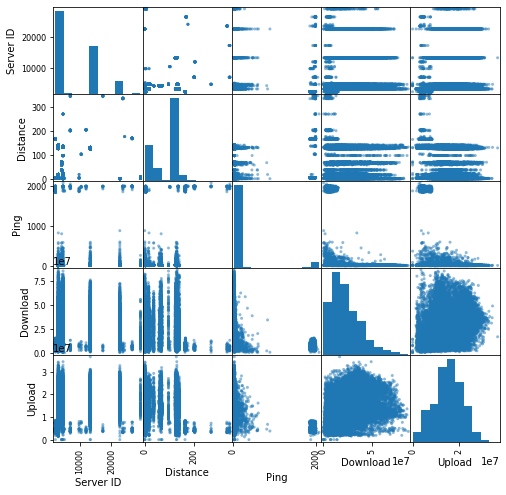

In [60]:
# Tarkastellaan numeeristen muuttujien keskinäisiä riippuvuuksia
scattercols = ['Server ID', 'Distance', 'Ping', 'Download', 'Upload']
axs = pd.plotting.scatter_matrix(df[scattercols],figsize=(8, 8))

In [4]:
# Muutetaan Timestampin datatyyppi objektista datatime64:

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

Tutkitaan datasta käytettyjen Serveri ID:n lukumäärää ja niiden esiintymistä. Ne eivät vastaa täysin toisiaan, koska samalla Sponsorilla voi ola useita servereitä.

In [5]:
ID_lkm = df['Server ID'].value_counts().to_frame()
print(ID_lkm)

       Server ID
13247       9092
3038        8470
4549        2949
4113        2678
22669       2356
2138        1788
29251        117
6875          60
26606         43
4565          40
23637         23
11898         20
9681          14
17254         12
10343         10
5055           4
24196          4


In [13]:
# keskitytään vain kahteen sarakkeeseen
dserver_u = df[['Sponsor', 'Upload']]
print(dserver_u.head(), '\n')
print(dserver_u.Sponsor.unique())

      Sponsor        Upload
0  AinaCom Oy  2.298769e+07
1   Elisa Oyj  2.232226e+07
2   Elisa Oyj  2.550727e+07
3  AinaCom Oy  2.603921e+07
4   Elisa Oyj  2.568938e+07 

['AinaCom Oy' 'Elisa Oyj' 'Seltimil Oy' 'Netplaza Oy' 'GLH Netsolutions'
 'Omerta.io' 'JNT' 'Kaisanet Oy' 'Mati forsman' 'Teliacommunication Oy'
 'Elmo' 'Lounea' 'Keski-Suomen Valokuituverkot Oy' 'MPY Palvelut Oyj'
 'Storbackas' 'Napapiirin Kuituverkot Oy' 'Web1 Oy' 'MPY Telecom Oyj']


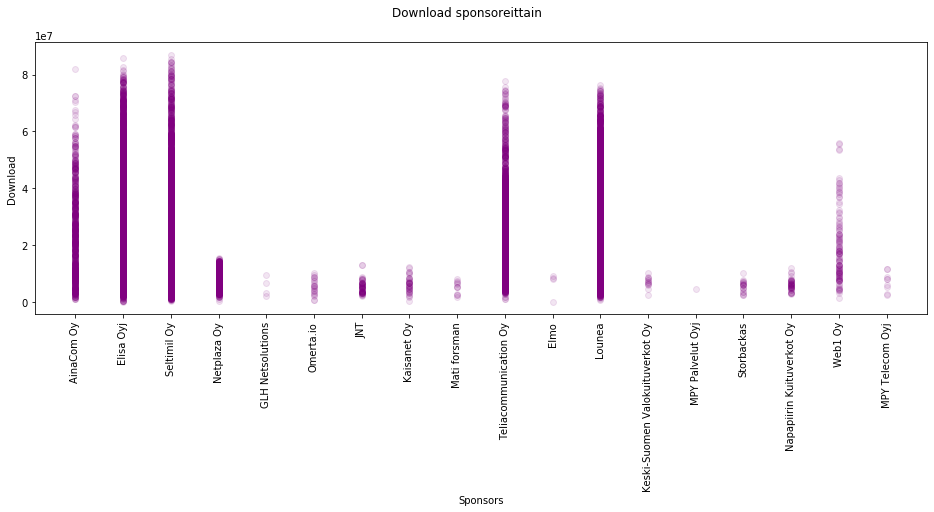

In [55]:
# Download Sponsorien funktiona 
x = df.Sponsor
y = df.Download

plt.rcParams['figure.figsize'] = (16,5)

plt.xlabel('Sponsors')
plt.ylabel('Download')
plt.xticks(rotation=90)
plt.scatter(x, y, color='purple', alpha=0.10)
plt.suptitle('Download sponsoreittain')
plt.show()

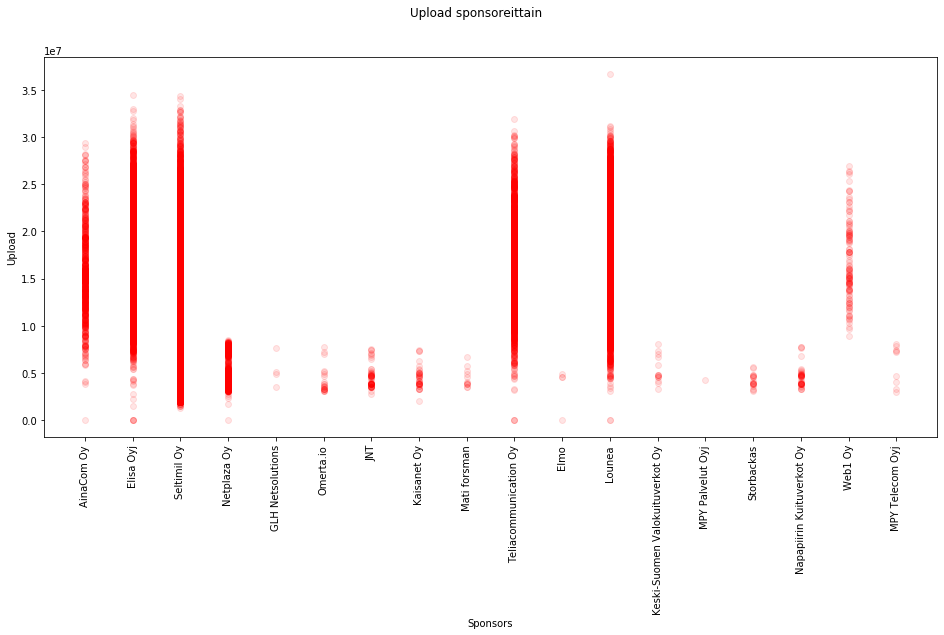

In [51]:
# Upload Sponsorien funktiona 
x = df.Sponsor
y = df.Upload

plt.rcParams['figure.figsize'] = (16,7)

plt.xlabel('Sponsors')
plt.ylabel('Upload')
plt.xticks(rotation=90)
plt.scatter(x, y, color="red", alpha=0.1)
plt.suptitle('Upload sponsoreittain')
plt.show()

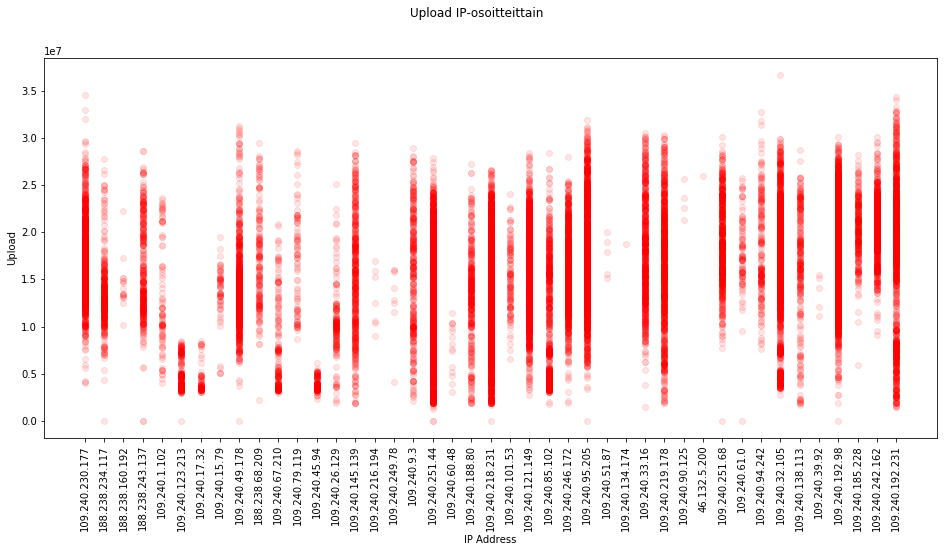

In [53]:
# Upload IP Addressin funktiona 
x = df['IP Address']
y = df.Upload

plt.rcParams['figure.figsize'] = (16,7)

plt.xlabel('IP Address')
plt.ylabel('Upload')
plt.xticks(rotation=90)
plt.scatter(x, y, color="red", alpha=0.1)
plt.suptitle('Upload IP-osoitteittain')
plt.show()

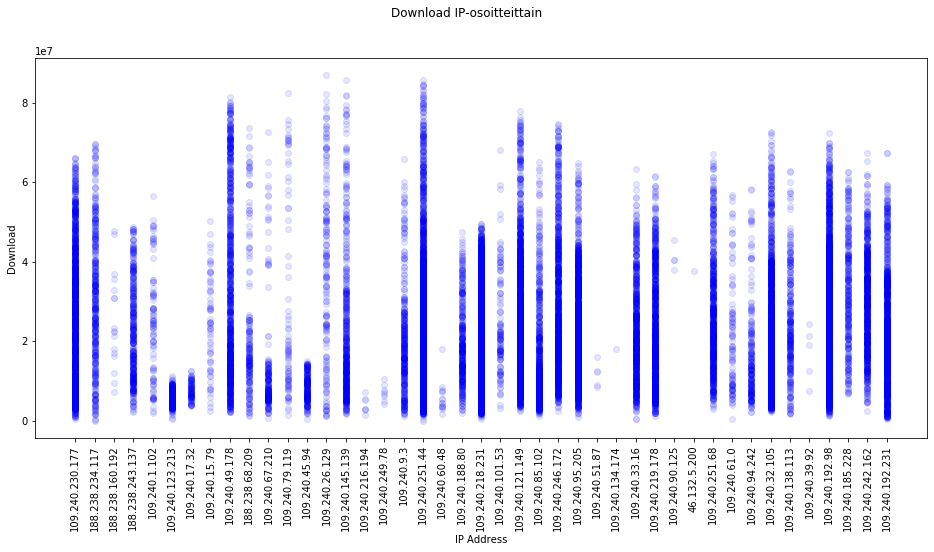

In [54]:
# Download IP Addressin funktiona 
x = df['IP Address']
y = df.Download

plt.rcParams['figure.figsize'] = (16,7)

plt.xlabel('IP Address')
plt.ylabel('Download')
plt.xticks(rotation=90)
plt.scatter(x, y, color="b", alpha=0.1)
plt.suptitle('Download IP-osoitteittain')
plt.show()

In [43]:
df.describe()

,Server ID,Distance,Ping,Download,Upload,Share
count,27680.000000,27680.000000,2.768000e+04,2.768000e+04,2.768000e+04,0.0
mean,8466.049819,92.508027,2.134161e+02,2.292833e+07,1.521940e+07,NaN
std,6510.544510,56.816467,7.231648e+03,1.489841e+07,6.020490e+06,NaN
min,2138.000000,0.000000,1.940800e+01,0.000000e+00,0.000000e+00,NaN
25%,3038.000000,21.811732,2.691000e+01,1.125383e+07,1.142073e+07,NaN
50%,4549.000000,128.067999,2.892800e+01,1.973021e+07,1.539129e+07,NaN
75%,13247.000000,130.148654,3.159625e+01,3.179553e+07,1.937616e+07,NaN
max,29251.000000,345.199800,1.200534e+06,8.697986e+07,3.670865e+07,NaN


In [58]:
median = df['Ping'].median()
df['Ping'] = df['Ping'].mask(df['Ping'] > 5.0e+03, median)
df['Ping'].median()

28.928